# **Predicting the cost of homes in California**

---



---



**Objective : Predict the cost of home price using 9 feature variables and 1 target variables**



Feature variables
1. Longitude
2. Latitude
3. Housing Median Age
4. Total Rooms
5. Total Bed Rooms
6. Population
7. Households
8. Median Income
9. Ocean Proximity

target Variable
 * Median House Price

Importing libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
#read in the data with read_csv() into a pandas dataframe
housing_df = pd.read_csv('housing.csv')

#use .info() to show the feature in your dataset along with a count and datatype
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#(row count, column count)
housing_df.shape

(20640, 10)

In [5]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data visualizations to see relationship of the target variable with other features

Text(0.5, 0, 'House values')

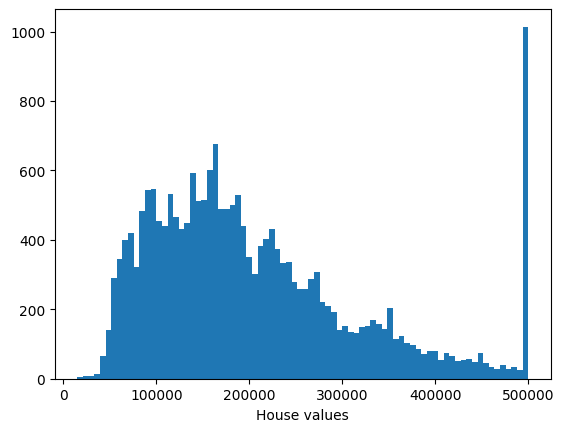

In [8]:
#plot teh distribution of the target variable using a histogram
#bins = amount of columns

plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House values")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

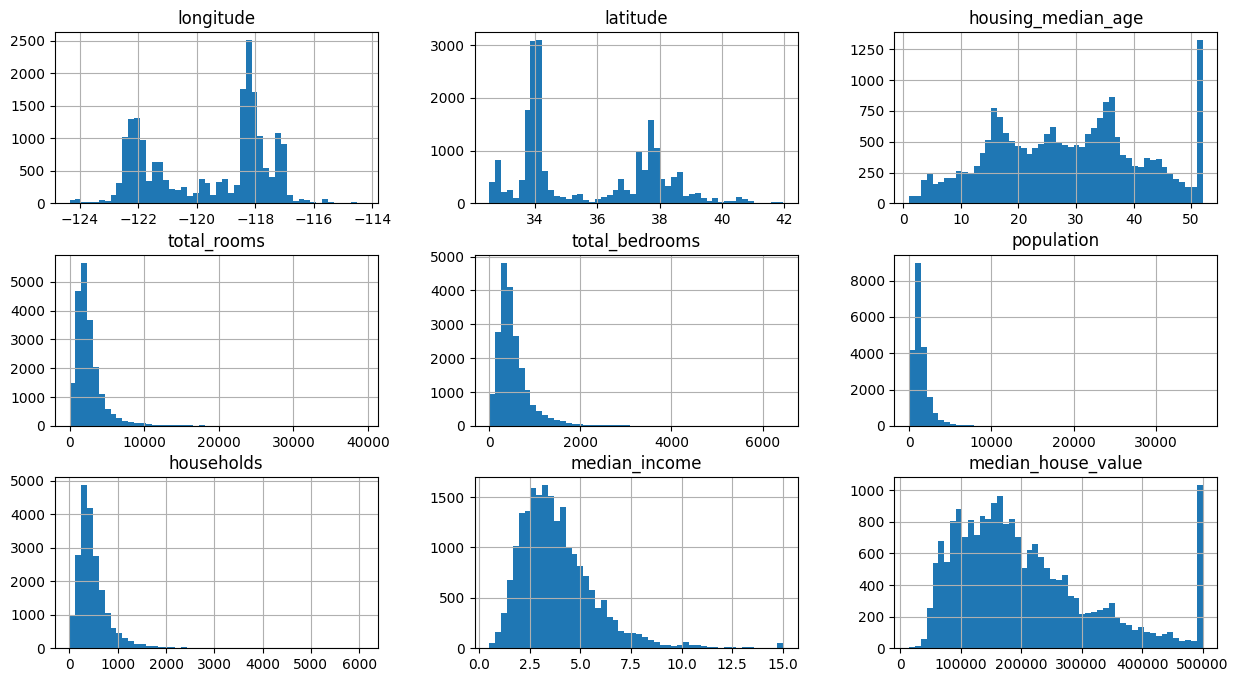

In [9]:
housing_df.hist(bins=50, figsize=(15,8))

Using a heatmap to show correlation

In [11]:
corr = housing_df.corr(numeric_only=True) # data frame correlation function
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

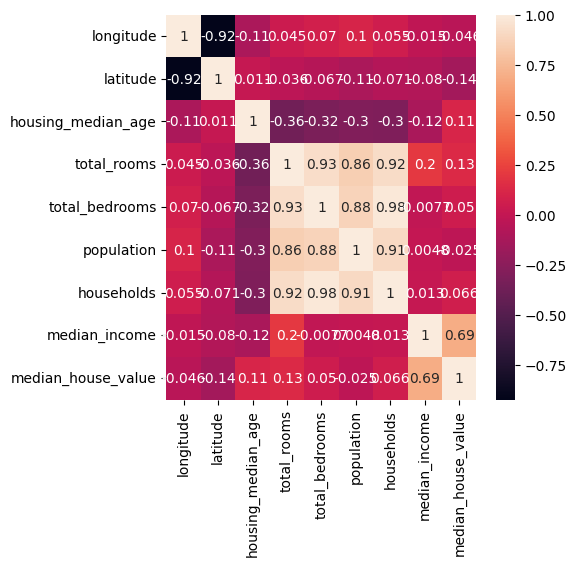

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True)
plt.show()

## **Prepare and Preprocess data**

Finding missing data

In [13]:
#verify which features have missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
#calculate the percentage of the missing data
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0]*100

1.002906976744186

impute missing data using machine learning

In [18]:
from sklearn.impute import KNNImputer

#create a temporary copy of the dataset
housing_df_temp = housing_df.copy()

#retrieve columns with numerical data: will exclude the ocean-proximity column since the datatype is object
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype!='object']

#extract columns that contain at least one missing values
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

#update temp dataframe with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]

In [19]:
#initialize knnimputer to impute missing data using ml
knn = KNNImputer(n_neighbors = 3)

#fit function trains the model
knn.fit(housing_df_temp)

#transform the dta using the model
#applies the transformation model(ie; knn) to data
array_Values = knn.transform(housing_df_temp)

#convert the array values to a dataframe with the approriate column names
housing_df_temp = pd.DataFrame(array_Values, columns = new_column_list)

In [20]:
housing_df_temp.isnull().sum()

total_bedrooms    0
dtype: int64

In [21]:
housing_df_temp.head()

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0


In [22]:
#overlay the imputed column over the old column with missing values

#loop trough the list of columns and overlay each one
for column_name in new_column_list:
  housing_df[column_name] = housing_df_temp.replace(housing_df[column_name], housing_df[column_name])

#confirm columns no longer conatin null data
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Feature Engineering

In [23]:
# a new feature that is a ratio of the total rooms to households
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']

# a new feature that is a ratio of the total bedrooms to total rooms
housing_df['bedrooms_per_rooms'] = housing_df['total_bedrooms']/housing_df['total_rooms']

# a new feature that is a ratio of the population to households
housing_df['population_per_household'] = housing_df['population']/housing_df['households']

# a new feature that is a ratio of the total rooms to households
housing_df['coords'] = housing_df['longitude']/housing_df['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_rooms        20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [24]:
#remove those features
housing_df = housing_df.drop('total_rooms', axis=1)
housing_df = housing_df.drop('households', axis=1)
housing_df = housing_df.drop('total_bedrooms', axis=1)
housing_df = housing_df.drop('population', axis=1)
housing_df = housing_df.drop('longitude', axis=1)
housing_df = housing_df.drop('latitude', axis=1)

In [25]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_rooms        20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


Heatmap after removing correlation

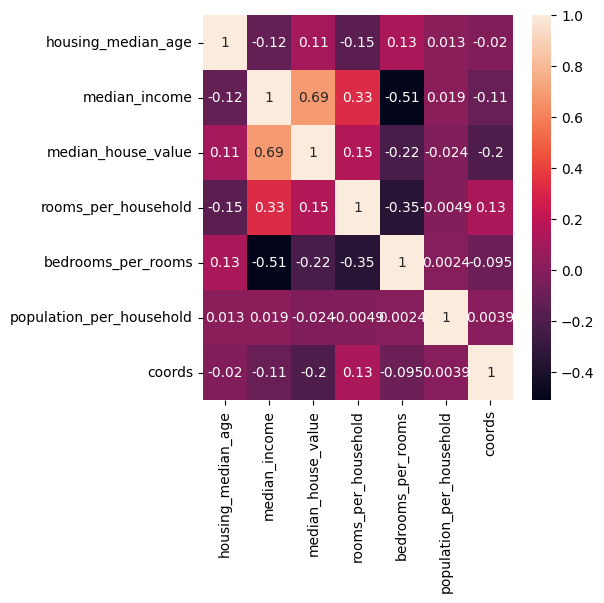

In [27]:
corr = housing_df.corr(numeric_only=True)
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True)
plt.show()

## Encoding Categorical Data

In [28]:
#unique categories of ocean
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [29]:
housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

One-hot encoding

In [30]:
print(pd.get_dummies(housing_df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [31]:
#replace the ocean_proximity column using get_dummies()
h_df_encoded = pd.get_dummies(data= housing_df, columns=['ocean_proximity']) # places the 1 to indicate the value

In [32]:
h_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False


## Training the Model

In [34]:
import sklearn
from sklearn.model_selection import train_test_split

#remove spaces from columns names and convert all to lowercase and remove special characters
h_df_encoded.columns = [c.lower().replace(' ', '_').replace('<','_') for c in h_df_encoded.columns]

# Define your features (X) and target variable (y)
X = h_df_encoded[['housing_median_age','median_income','bedrooms_per_rooms','population_per_household','coords','ocean_proximity__1h_ocean','ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
y = h_df_encoded['median_house_value']

print(X)

       housing_median_age  median_income  bedrooms_per_rooms  \
0                    41.0         8.3252            0.146591   
1                    21.0         8.3014            0.155797   
2                    52.0         7.2574            0.129516   
3                    52.0         5.6431            0.184458   
4                    52.0         3.8462            0.172096   
...                   ...            ...                 ...   
20635                25.0         1.5603            0.224625   
20636                18.0         2.5568            0.215208   
20637                17.0         1.7000            0.215173   
20638                18.0         1.8672            0.219892   
20639                16.0         2.3886            0.221185   

       population_per_household    coords  ocean_proximity__1h_ocean  \
0                      2.555556 -3.226769                      False   
1                      2.109842 -3.228209                      False   
2              

## Split training and test data

In [36]:
# we train the model with 70% of the samples and test with the remaining 30%
# x -> array with the inputs
# y -> array of the outputs

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=42, shuffle=True, test_size=0.3)

#confirm how the data was split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 10)
(6192, 10)
(14448,)
(6192,)


## Linear Regression

Model Training

In [37]:
#use scikit-learn's LinearRegression to train the model on both the training and evaluate it on the test sets
from sklearn.linear_model import LinearRegression

# create a linear regressior using all the feature variables
reg_model = LinearRegression()

#train the model using training set
reg_model.fit(x_train, y_train)

LinearRegression()

Run the predictions

In [38]:
#run the predictiojns on the training & testing data
y_pred_test = reg_model.predict(x_test)

Evaluate the model

In [39]:
#compare the actual values(target) with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
pred_test_df

,Actual,Predicted
20046,47700.0,103743.050896
3024,45800.0,92451.250932
15663,500001.0,219490.963844
20484,218600.0,283292.425471
9814,278000.0,244228.861575
...,...,...
17505,237500.0,210121.340663
13512,67300.0,74907.098235
10842,218400.0,216609.962950
16559,119400.0,127975.072923


XGBOOST